Introdução a Física Estatística Computacional: Integração por Monte Carlo

&nbsp;

Nome: Rodrigo Ferreira Araujo \\
Matrícula: 2020006990

&nbsp;&nbsp;

Importação de bibliotecas úteis e definição de tamanho padrão para os plots

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (22,12)

&nbsp;
Definição das 3 primeiras funções a serem integradas via métodos Monte Carlo.

In [ ]:
def f1(x): return 1 - (x ** 2)
def f2(x): return (math.e) ** x
def f3(x): return (math.sin(x)) ** 2

&nbsp;
Para o primeiro método Monte Carlo, escolhemos **N_total** pontos cartesianos aleatórios em um retângulo de comprimento definido pelo intervalo da respectiva integral e altura limitada pelos valores máximos das funções nesses intervalos de x. 
&nbsp;
Desse modo, obtemos retângulos cujas áreas contêm toda a área embaixo dos gráficos das respectivas funções que envolvem. Em posse das áreas dos retângulos, conseguimos aproximar os valores das integrais (Área sob o gráfico) conforme a razão: 
&nbsp;
ÁreaSobGráfico / ÁreaRetângulo = PontosEncontradosAbaixoDoGráfico / N_total

In [ ]:
minf1 = 0.; maxf1 = 1.;     # Valores mínimo (não-negativo) e máximo alcançados pela área sob o gráfico da primeira função
minf2 = 0.; maxf2 = math.e; # Valores mínimo (não-negativo) e máximo alcançados pela área sob o gráfico da segunda função
minf3 = 0.; maxf3 = 1.;     # Valores mínimo (não-negativo) e máximo alcançados pela área sob o gráfico da terceira função

N_amos = 1000               # Número de amostras padrão

&nbsp;
Codificação do Método 1: retorna o valor aproximado da integral de acordo com **N_total**

In [ ]:
# hits/N_total = integral/(a2 - a1)(max_value - min_value)
def m1(N_total, f, a1, a2, min_value, max_value):
    hits = 0
    for i in range(N_total):
        x = random.uniform(a1, a2)
        y = random.uniform(min_value, max_value)
        if y < f(x): hits += 1
    return hits * (a2 - a1) * (max_value - min_value) / N_total

&nbsp;
Para o segundo método, escolhemos **N_total** pontos x dentro do intervalo de integração **(a1, a2**) e calculamos a média de todas as coordenadas y obtidas aplicando cada x à função **f** indicada nos parâmetros. Esta seria a "altura média" do retângulo de comprimento **a1 - a2** que aproximamos ter a mesma área que aquela encontrada sob o gráfico de **f**. Portanto, retornamos a área desse retângulo.

In [ ]:
def m2(N_total, f, a1, a2):
    x_values = []
    for i in range(N_total): x_values.append(random.uniform(a1, a2))
    return ((a2 - a1) / N_total) * (sum([f(x) for x in x_values]))

&nbsp;
Função que calcula e retorna um array de **N_amos** resultados de integrais para uma determinada função, intervalo de integração, valor máximo e mínimo, método Monte Carlo e número **N_total**.

In [ ]:
def sample(N_amos, method, N_total, args):
  values = []
  for i in range(N_amos): values.append(method(N_total, *args))
  return values

&nbsp;
Função para apresentar os histogramas de 1000 resultados das integrais para todas as combinações de função, métodos de integração e números **N_total**: Integrais 1, 2 e 3 sob os métodos 1 e 2 descritos acima com **N_total** = 100, 1000 ou 10000.

In [ ]:
def show_hists(N_amos, f, int_num, x_interval, min_max, rng):
  fig, axs = plt.subplots(2, 3)
  
  for i in range(3):
    axs[0, i].hist(sample(N_amos, m1, 10 ** (i + 2), [f, *x_interval, *min_max]), bins = 28);
    axs[0, i].set_title(f"Amostragem da integral {int_num} pelo método 1 com N_total = {10 ** (i + 2)}");
    axs[0, i].set_xlim(*rng);
    
  for i in range(3):
    axs[1, i].hist(sample(N_amos, m2, 10 ** (i + 2), [f, *x_interval]), bins = 28);
    axs[1, i].set_title(f"Amostragem da integral {int_num} pelo método 2 com N_total = {10 ** (i + 2)}");
    axs[1, i].set_xlim(*rng);

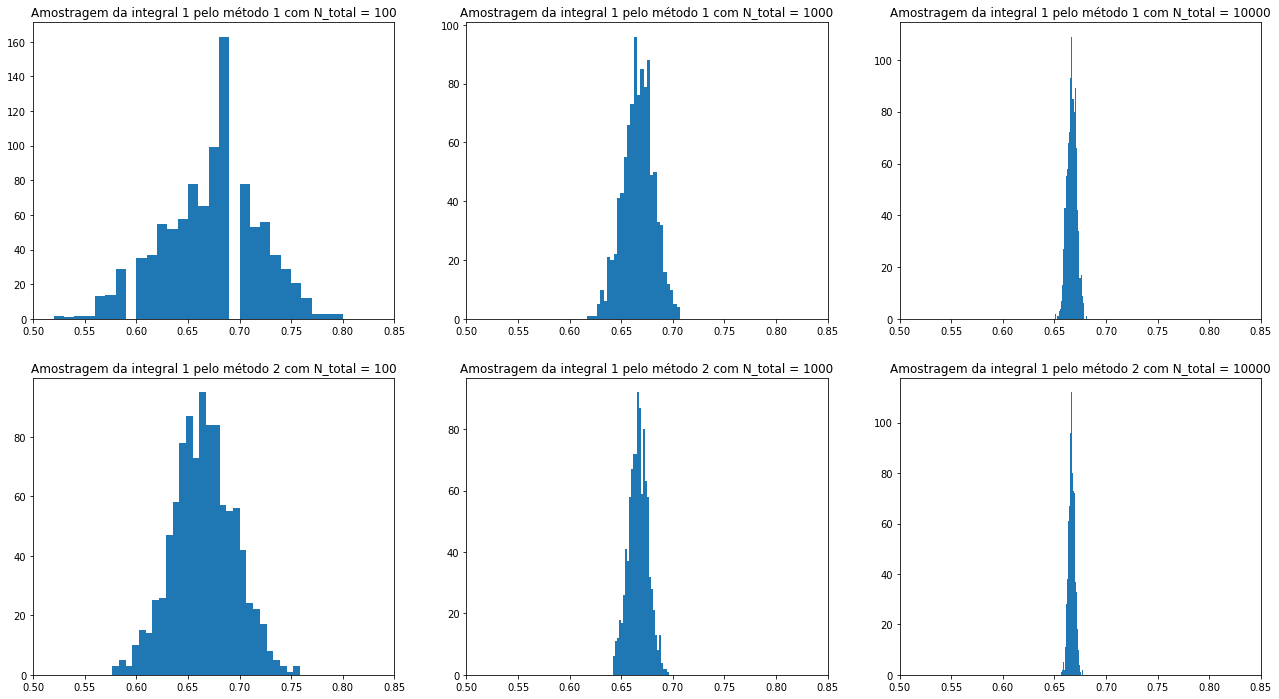

In [ ]:
show_hists(N_amos, f1, 1, [0, 1], [minf1, maxf1], [0.50, 0.85]);

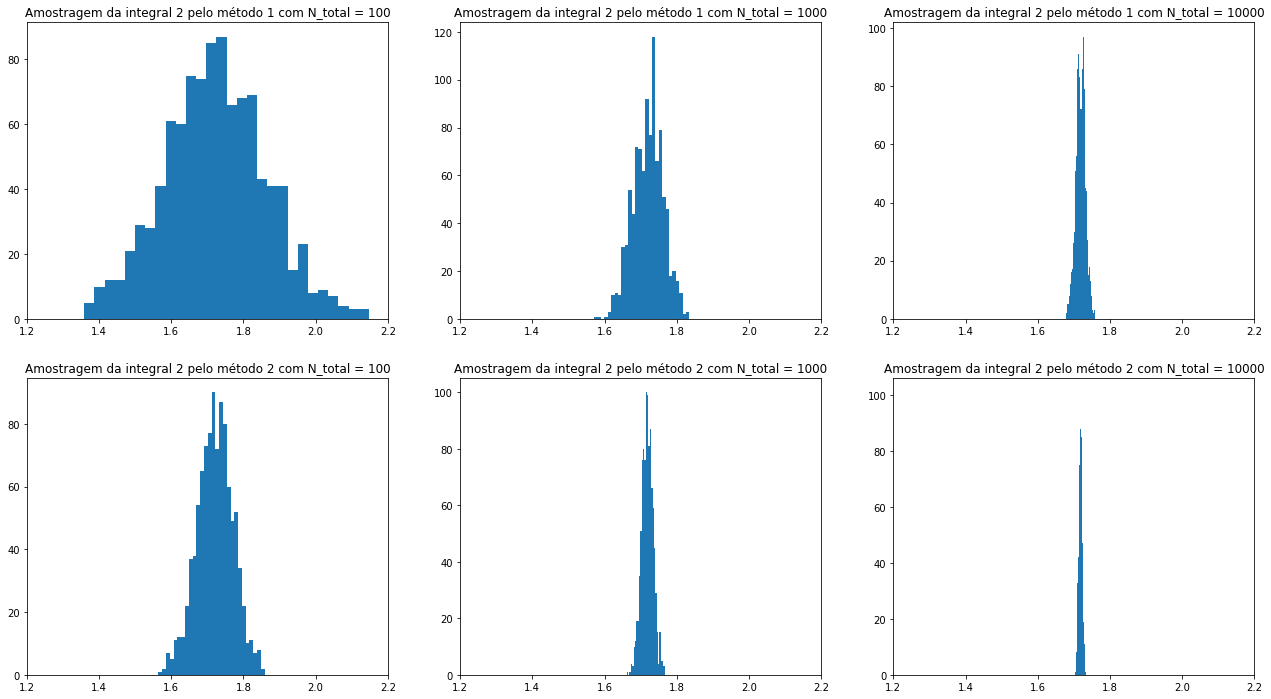

In [ ]:
show_hists(N_amos, f2, 2, [0, 1], [minf2, maxf2], [1.2, 2.2]);

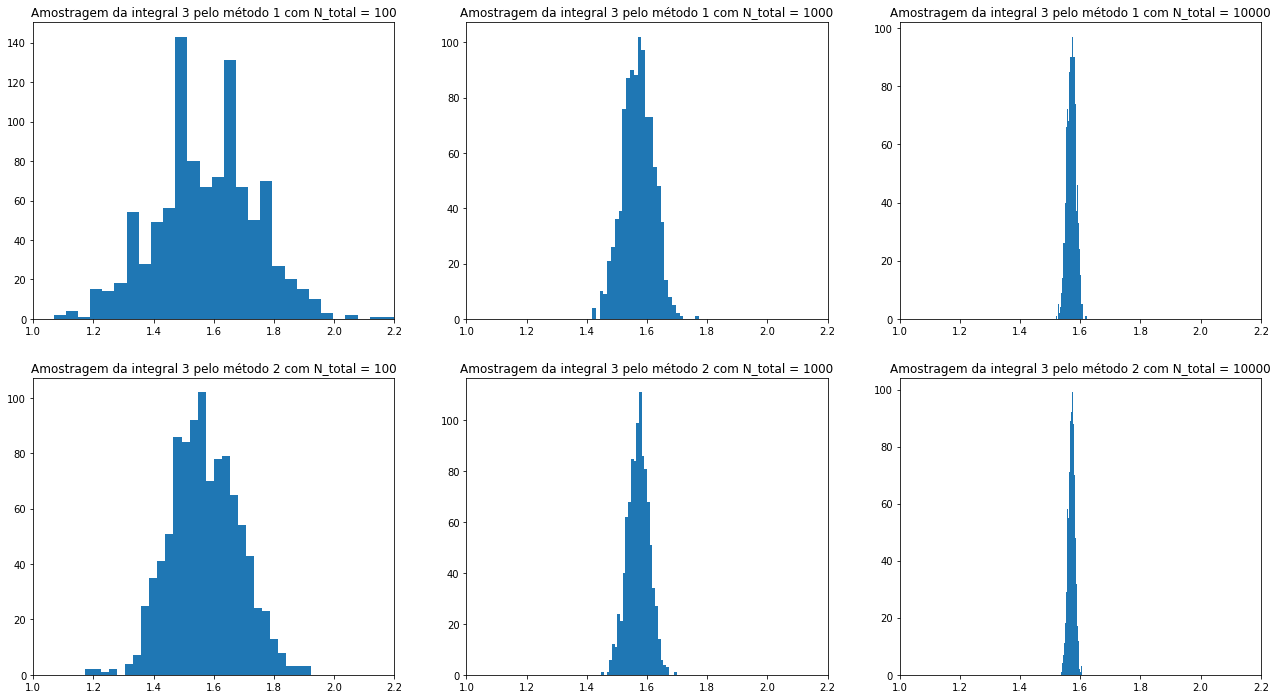

In [ ]:
show_hists(N_amos, f3, 3, [0, math.pi], [minf3, maxf3], [1.0, 2.2]);

&nbsp;
Comentário sobre os resultados observados:
&nbsp;
Ambos os métodos de integração mostraram uma precisão relativamente boa em estimar os valores analíticos de todas as integrais, de modo que os histogramas formaram distribuições Gaussianas aproximadamente centradas nos resultados esperados.

&nbsp;

Em ambos os métodos, para valores crescentes de **N_total**, observamos uma diminuição das amplitudes das distribuições normais em todas as funções, mas convergindo para os respectivos valores analíticos. Nesse sentido, o método 2 de integração apresentou uma convegência ligeiramente maior para os valores esperados do que o método 1. Podemos explicar esse comportamento com o fato de que, no método 1, muitos pontos selecionados aleatoriamente caem "fora" da função.

&nbsp;

Desse modo, a estimativa da razão entre as áreas do retângulo e a área sob o gráfico pode ficar mais imprecisa a medida que o gráfico apresenta irregularidades como picos e vales ígremes no intervalo de integração especificado, ou seja, com um retângulo bem maior proporcionalmente ao gráfico temos uma porção grande de pontos não contabilizados para o cálculo da integral.

&nbsp;&nbsp;&nbsp;

Cálculo da Integral Múltipla:

&nbsp;

A função f4 abaixo define o comportamento especificado para o cálculo da integral múltipla

In [ ]:
# def f4(x, y, z): return 1 / sum( [ (x[0] + x[1]) * x[2], (y[0] + y[1]) * y[2], (z[0] + z[1]) * z[2] ] )
def f4(x, y, z): return 1 / (((x[0] + y[0]) * z[0]) + ((x[1] + y[1]) * z[1]) + ((x[2] + y[2]) * z[2]))

&nbsp;
Função que aproxima a integral pelo método 2: Escolhemos **N_total** pontos multidimensionais para cada uma das variáveis x, y e z e tiramos a média dos valores de retorno de f4 para cada um desses pontos (valor esperado de f4). Note que <f4(x, y, z)> corresponde ao valor da integral desejada pois todos os intervalos de integração são [0, 1].

In [ ]:
# intervalos de 0 -> 1 para cada integral
def multi_integral(N_total, f):
  sum = 0
  for i in range(N_total): 
    x1 = random.uniform(0, 1);x2 = random.uniform(0, 1);x3 = random.uniform(0, 1);
    y1 = random.uniform(0, 1);y2 = random.uniform(0, 1);y3 = random.uniform(0, 1);
    z1 = random.uniform(0, 1);z2 = random.uniform(0, 1);z3 = random.uniform(0, 1);
    sum += f([x1, x2, x3], [y1, y2, y3], [z1, z2, z3]);
  return sum / N_total

In [ ]:
def show(N_total, N_amos):
  results = []
  for i in range(N_amos): results.append(multi_integral(N_total, f4))
  plt.hist(results, bins=28)
  plt.xlim(0.8, 1)

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)

&nbsp;
Após múltiplos testes, podemos observar uma boa aproximação para a integral múltipla com **N_total** = 10000 pontos aleatórios e 1000 amostras do método 2.

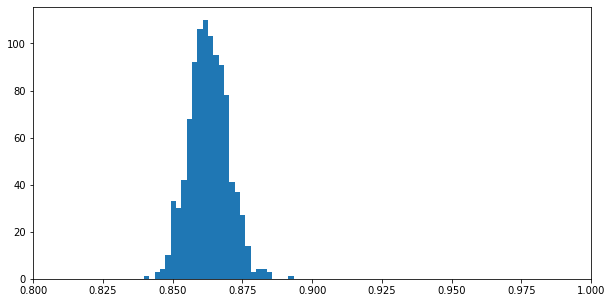

In [ ]:
show(10000, 1000)